In [2]:
options(warn=-1)
library("igraph")
library('Matrix')
library('pracma')
library('entropy')
library('infotheo')

# 2. Google+ network

In [2]:
# Q)18

# Loop through .circles files, and find those with >2 lines (2 circle memberships)
all_files = list.files(path="gplus", pattern="*.circles")
count = 0
for (iFile in all_files){
  if (length(readLines(paste("gplus", iFile,sep="/"))) > 2){
    count = count + 1
  }
}

print(paste("Number of nodes with > 2 circles: ",count))

[1] "Number of nodes with > 2 circles:  57"


[1] "Working on node 109327480479767108490 ..."
[1] "In-Degree: Mean=14.062, Var=96.001"
[1] "Out-Degree: Mean=14.062, Var=4588.177"


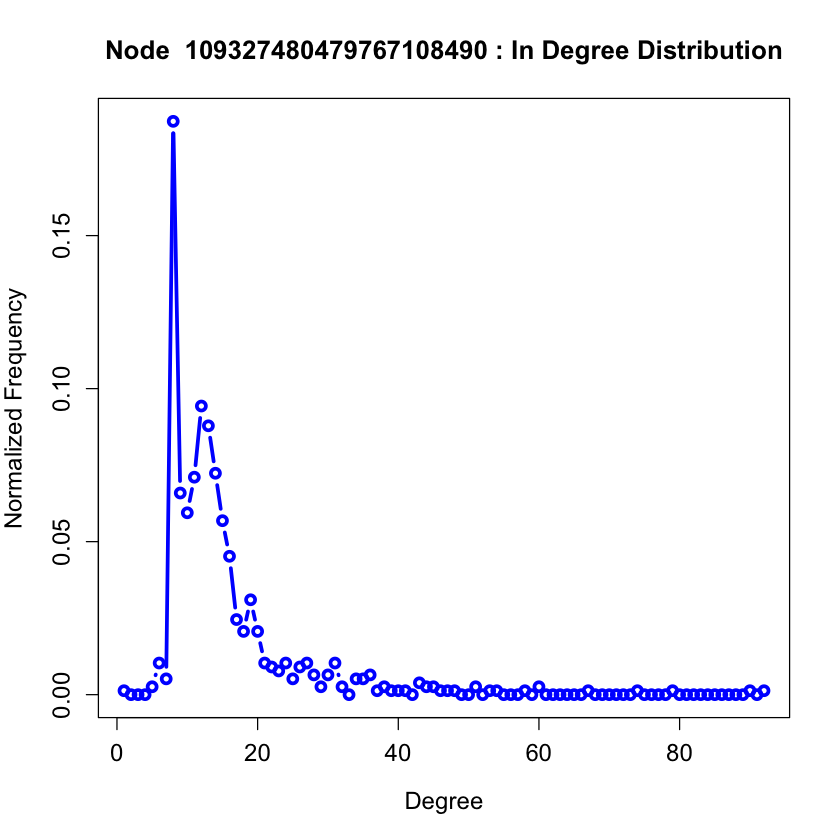

[1] "Working on node 115625564993990145546 ..."
[1] "In-Degree: Mean=43.640, Var=1020.621"
[1] "Out-Degree: Mean=43.640, Var=9351.303"


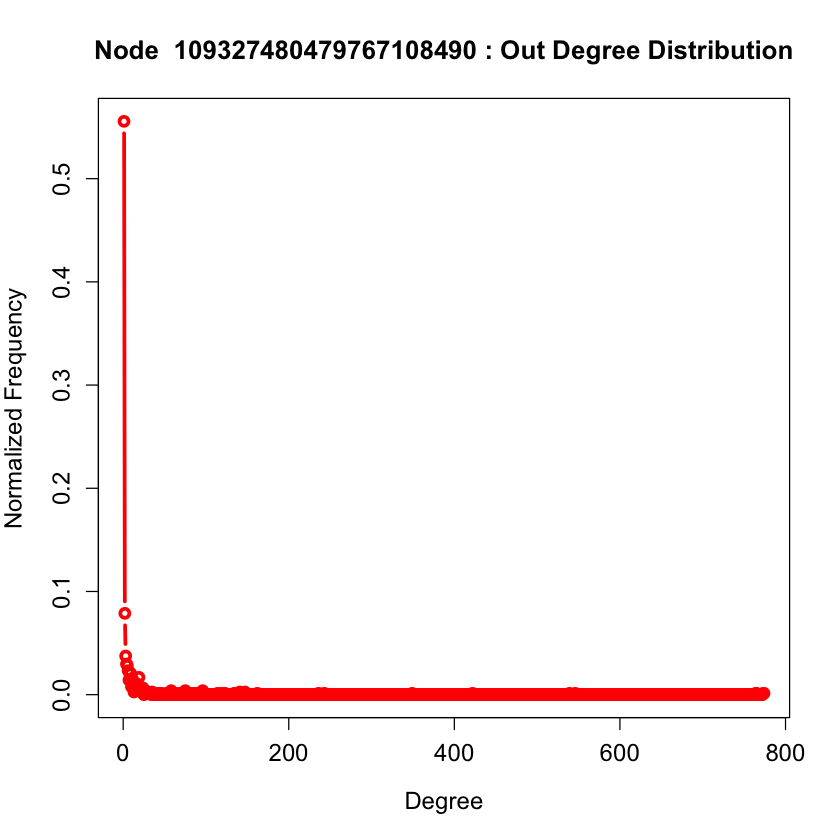

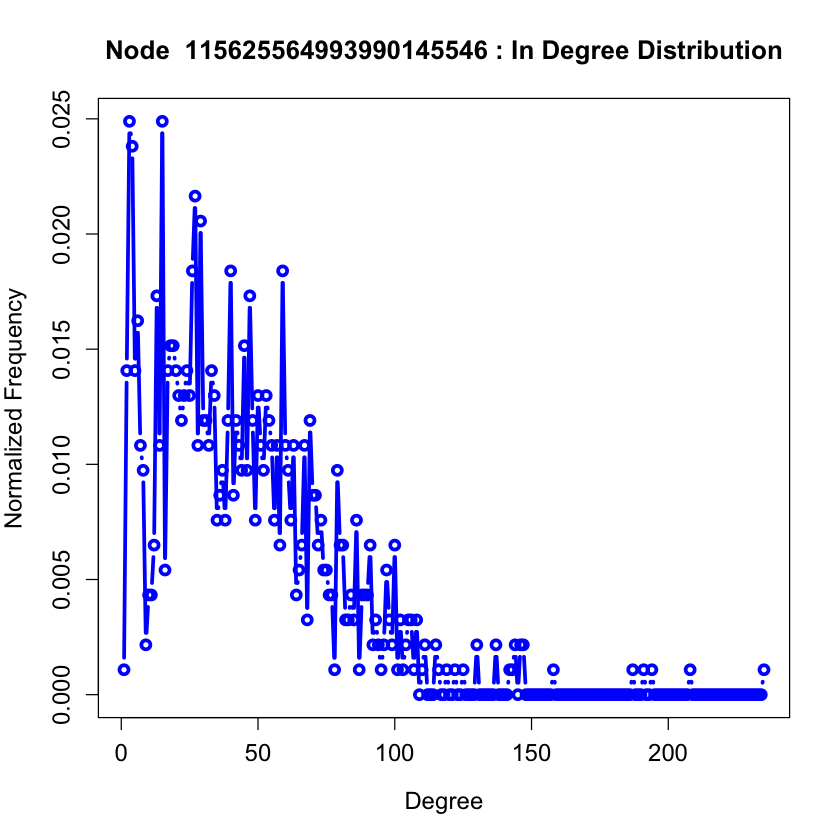

[1] "Working on node 101373961279443806744 ..."
[1] "In-Degree: Mean=298.118, Var=86408.770"
[1] "Out-Degree: Mean=298.118, Var=166186.737"


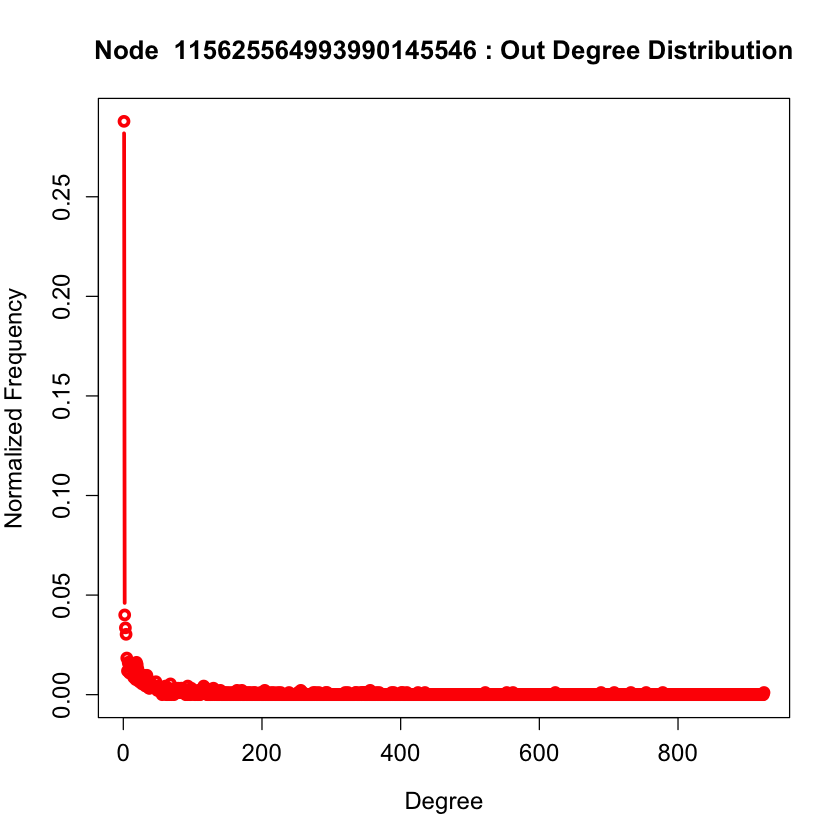

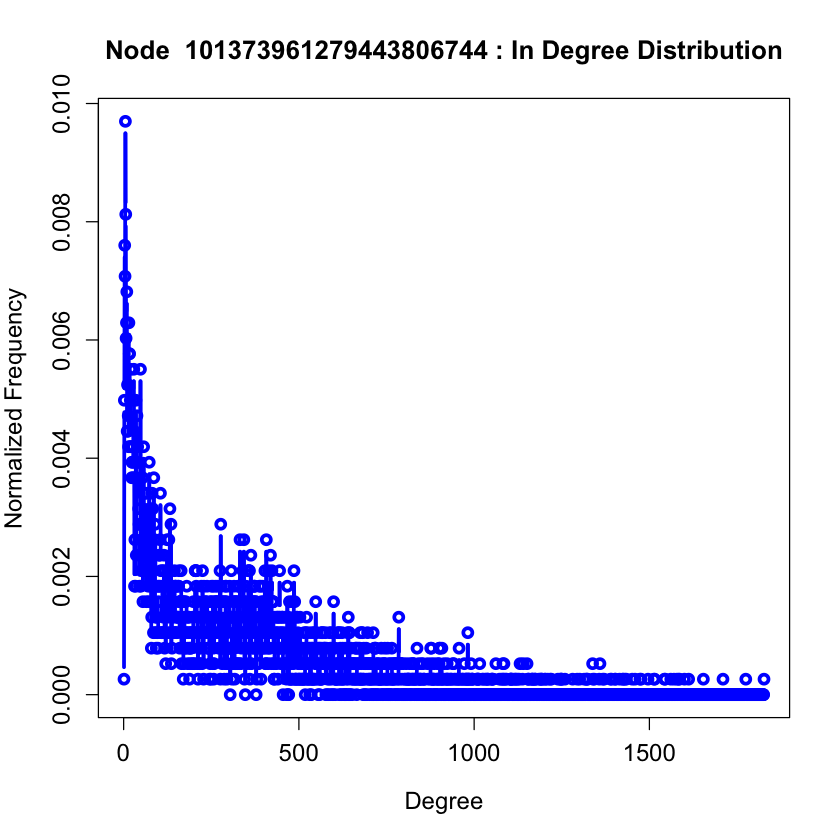

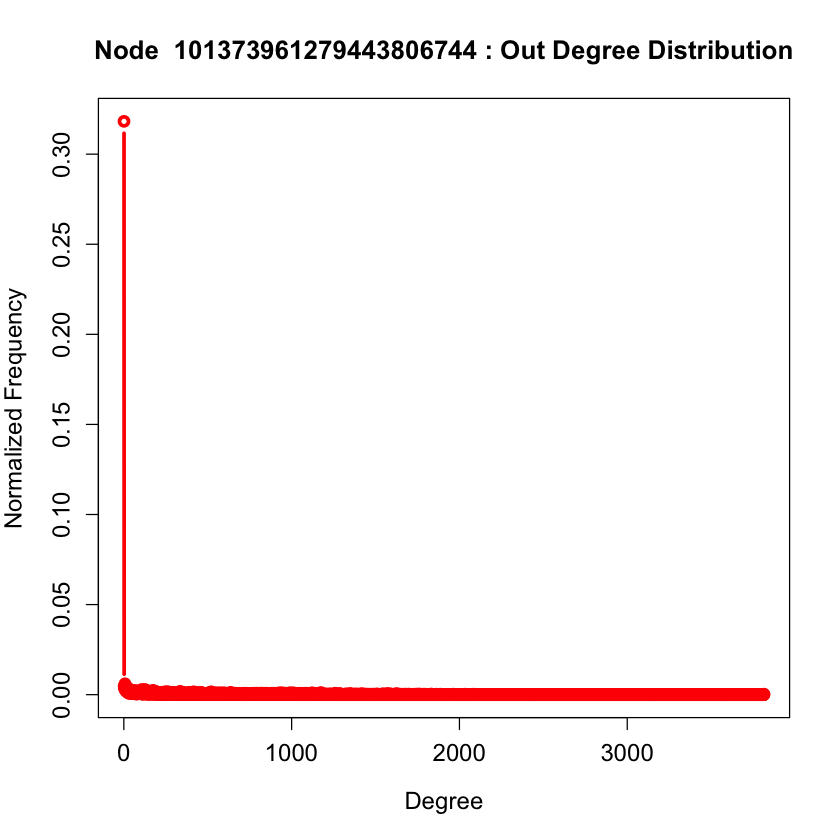

In [8]:
# Q19)

# Nodes to analyze
nodes = c("109327480479767108490","115625564993990145546","101373961279443806744")

for (node in nodes){
    print(sprintf('Working on node %s ...',node))
    # Create file and read in graph
    edgefile = paste("gplus/", node, ".edges", sep = "")
    node_graph = read_graph(edgefile, format="ncol", directed=TRUE)
    
    # Add vertex and edges for node (not included by default)
    node_graph = add_vertices(node_graph, nv = 1, name = node)
    indexNode = which(V(node_graph)$name==node)
    
    for (iGNode in seq(1, vcount(node_graph)-1,1)){
      node_graph = node_graph + edge(indexNode, iGNode)
    }
    
    
    # Print out mean/var stats
    deg_in = degree(node_graph,mode = "in")
    print(sprintf('In-Degree: Mean=%5.3f, Var=%5.3f',mean(deg_in),var(deg_in)))
    deg_out = degree(node_graph,mode = "out")
    print(sprintf('Out-Degree: Mean=%5.3f, Var=%5.3f',mean(deg_out),var(deg_out)))

    # Plot In/Out deg distirbutions
    hist_in = degree_distribution(node_graph, mode = "in")
    plot(hist_in, type="b", main=paste("Node ", node, ": In Degree Distribution"), lwd = 3,
        xlab="Degree", ylab="Normalized Frequency",col="blue",cex.main = 1.3, cex.lab =1.2, cex.axis = 1.2)
    
    hist_out = degree_distribution(node_graph, mode = "out")
    plot(hist_out, type="b", main=paste("Node ", node, ": Out Degree Distribution"), lwd = 3,
        xlab="Degree", ylab="Normalized Frequency",col="red",cex.main = 1.3, cex.lab =1.2, cex.axis = 1.2)
}

## Community structure of personal networks

[1] "Working on node 109327480479767108490 ..."
[1] "Modularity for node 109327480479767108490 is 0.252765387296677 ..."
[1] "Community Count for node 109327480479767108490 is 4 ..."
[1] "Working on node 115625564993990145546 ..."
[1] "Modularity for node 115625564993990145546 is 0.319472551345825 ..."
[1] "Community Count for node 115625564993990145546 is 10 ..."


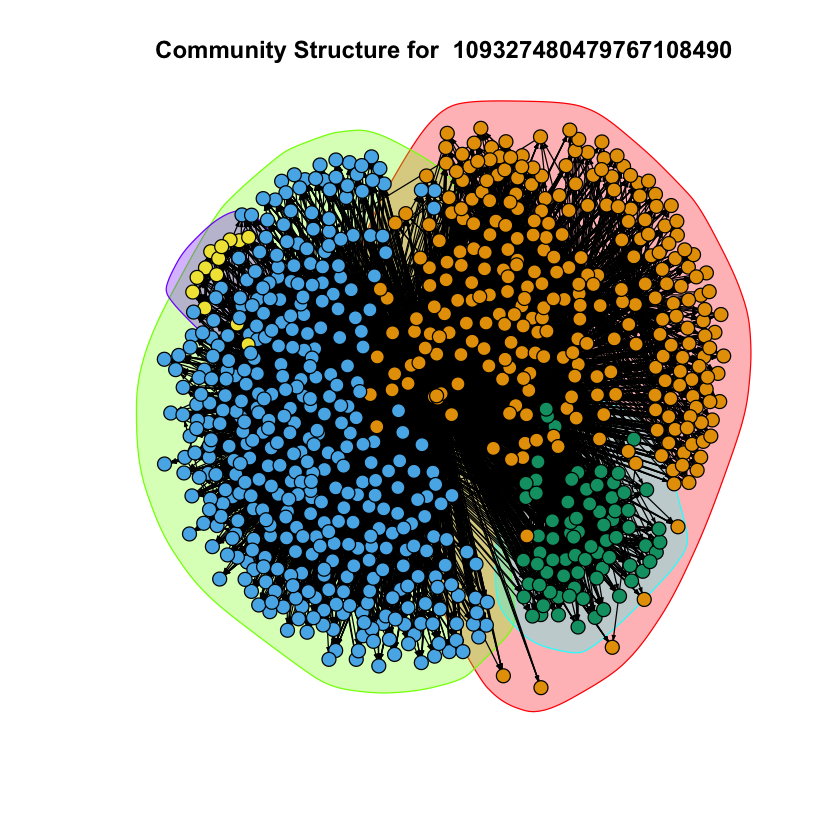

[1] "Working on node 101373961279443806744 ..."
[1] "Modularity for node 101373961279443806744 is 0.191090270876884 ..."
[1] "Community Count for node 101373961279443806744 is 31 ..."


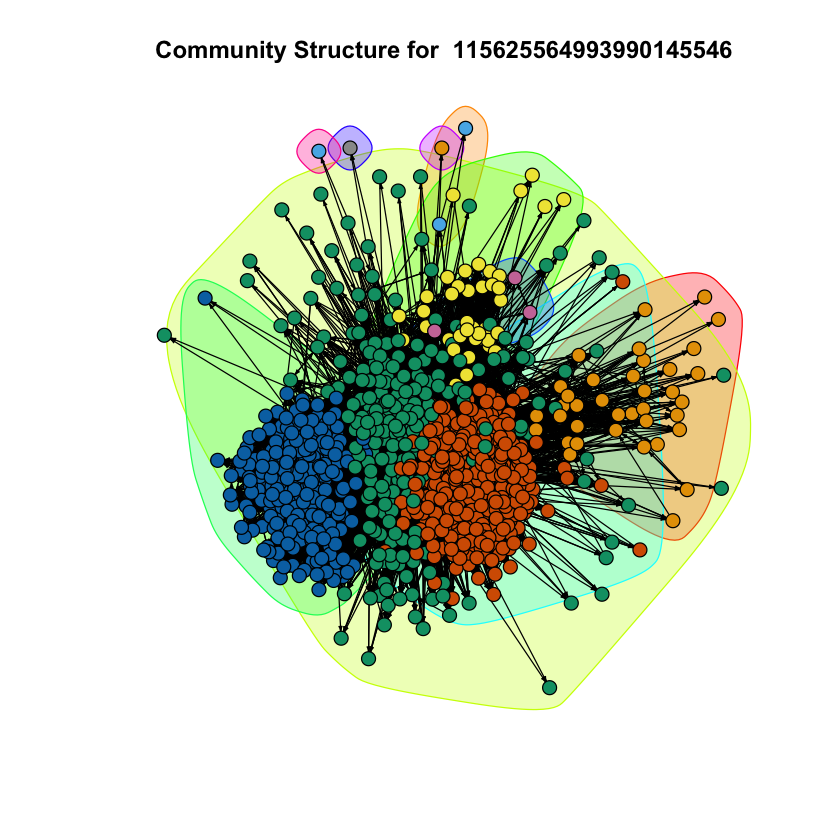

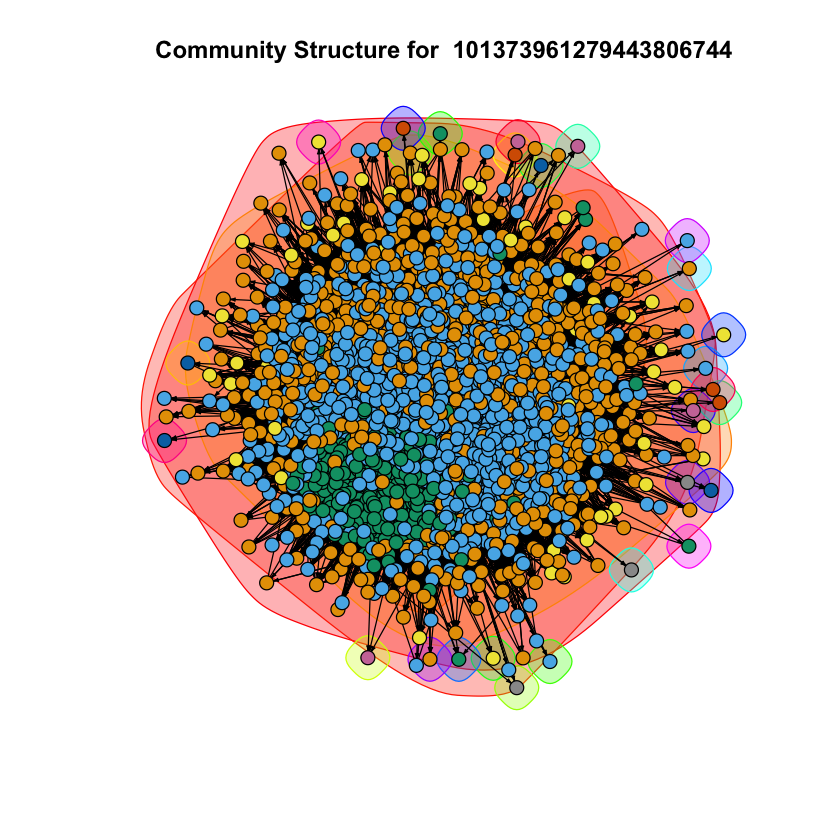

In [5]:
# Q20)

# Nodes to analyze
nodes = c("109327480479767108490","115625564993990145546","101373961279443806744")

for (node in nodes){
    print(sprintf('Working on node %s ...',node))
    # Create file and read in graph
    edgefile = paste("gplus/", node, ".edges", sep = "")
    node_graph = read_graph(edgefile, format="ncol", directed=TRUE)
    
    # Add vertex and edges for node (not included by default)
    node_graph = add_vertices(node_graph, nv = 1, name = node)
    indexNode = which(V(node_graph)$name==node)
    
    for (iGNode in seq(1, vcount(node_graph)-1,1)){
      node_graph = node_graph + edge(indexNode, iGNode)
    }
    
    
    node_community = cluster_walktrap(node_graph)
    node_modularity = modularity(node_community)
    print(sprintf('Modularity for node %s is %s ...',node,node_modularity))
    print(sprintf('Community Count for node %s is %s ...',node,length(node_community)))
    plot(node_community, node_graph, edge.color = "black",vertex.label=NA, 
         vertex.size=5, edge.arrow.size=.2,
         main=paste("Community Structure for ", node))
}

In [11]:
# Question 22 Homogeneity and Completeness 
node = "109327480479767108490"

nodes_list = c("109327480479767108490","115625564993990145546","101373961279443806744")
for (node in nodes_list){
    
    # Load in circle file data
    print(sprintf('Working on node %s ...',node))
    circle_file = paste("gplus/", node, ".circles", sep = "")
    node_circle = readLines(file(circle_file, open="r"))
    
    # Get the circles for this node ID. 
    circles = list()
    for (circle_line in 1:length(node_circle)) {
        circle_nodes = strsplit(node_circle[circle_line],"\t")
        circles = c(circles, list(circle_nodes[[1]][-1]))
    }
    
    # N: total number of people with circle information
    total_circle=c()
    for (iCircle in circles)
        total_circle=c(total_circle,iCircle)
    total_circle=unique(total_circle)
    N=length(total_circle)
    
    # H(C) Entropy Completeness
    HC =0
    for (iCircle in circles){
        a_i = length(iCircle)
        HC=HC-((a_i/N)* log10(a_i/N)) 
    }

    # Find the community structure
    edgefile = paste("gplus/", node, ".edges", sep = "")
    node_graph = read_graph(edgefile, format="ncol", directed=TRUE)
    
    # Add vertex and edges for node (not included by default)
    node_graph = add_vertices(node_graph, nv = 1, name = node)
    indexNode = which(V(node_graph)$name==node)
    
    for (iGNode in seq(1, vcount(node_graph)-1,1)){
      node_graph = node_graph + edge(indexNode, iGNode)
    }
    
    node_community  = walktrap.community(node_graph)
    
    # Community based measures 
    HCK=0
    HKC=0
    HK=0
    
    # check percentage of match for walktrap community 
    for(m in 1:max(node_community$membership)){

        community_nodes = V(node_graph)$name[which(node_community$membership == m)]
        b_i=length(intersect(community_nodes,all_circle))
        if(b_i!=0) {
            HK <- HK - ((b_i/N) * log10(b_i/N))
            for (n in 1:length(circles)) {
                common_nodes = intersect(community_nodes, circles[[n]])
                c_ij<-length(unique(common_nodes))
                A_i<-length(circles[[n]])
                if(c_ij!=0){
                    HCK=HCK- ((c_ij/N)*log10(c_ij/b_i))
                    HKC = HKC - ((c_ij/N)*log10(c_ij/A_i))
                }
            }
        }
    }
    
    # Calculate homogenity, completeness and V-measure. 
    homogenity =  1-(HCK/HC)
    completeness = 1- (HKC/HK)
    
    print(sprintf("Entropy H(C) = %s",HC))
    print(sprintf("Entropy H(K) = %s",HK))
    print(sprintf("Conditional Entropy H(C|K) = %s",HCK))
    print(sprintf("Conditional Entropy H(K|C) = %s",HKC))
    
    print(sprintf("Homogeneity h= %s", homogenity))
    print(sprintf("Completeness c= %s", completeness))
}

[1] "Working on node 109327480479767108490 ..."
[1] "Entropy H(C) = 0.45634767"
[1] "Entropy H(K) = 0.43655637"
[1] "Conditional Entropy H(C|K) = 0.06759188"
[1] "Conditional Entropy H(K|C) = 0.29254781"
[1] "Homogeneity h= 0.85188512"
[1] "Completeness c= 0.32987391"
[1] "V-measure V= 0.47558710"

[1] "Working on node 115625564993990145546 ..."
[1] "Entropy H(C) = 3.67636649"
[1] "Entropy H(K) = 0.46955527"
[1] "Conditional Entropy H(C|K) = 2.01505212"
[1] "Conditional Entropy H(K|C) = 2.07729483"
[1] "Homogeneity h= 0.45189030"
[1] "Completeness c= -3.42396235"
[1] "V-measure V= 1.04119642"

[1] "Working on node 101373961279443806744 ..."
[1] "Entropy H(C) = 0.16690804"
[1] "Entropy H(K) = 0.21425076"
[1] "Conditional Entropy H(C|K) = 0.16626265"
[1] "Conditional Entropy H(K|C) = 0.53653499"
[1] "Homogeneity h= 0.00386671"
[1] "Completeness c= -1.50423839"
[1] "V-measure V= 0.00775334"

